In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Based on https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64

In [104]:
# Read data file into a dataframe
df = pd.read_csv("mlb_teams_final.csv") # change source file route if needed
df

,Unnamed: 0,year,team_name,games_played,wins,losses,runs_scored,walks,opponents_runs_scored,complete_games,shutouts,saves,outs_pitches,walks_allowed,strikeouts_by_pitchers,errors,class
0,0,1970,Atlanta Braves,162,76,86,736,522,772,45,9,24,4292,478,960,141,1
1,1,1970,Baltimore Orioles,162,108,54,792,717,574,60,12,31,4436,469,941,117,1
2,2,1970,Boston Red Sox,162,87,75,786,594,722,38,8,44,4339,594,1003,156,1
3,3,1970,California Angels,162,86,76,631,447,630,21,10,49,4387,559,922,127,1
4,4,1970,Chicago White Sox,162,56,106,633,477,822,20,6,30,4291,556,762,165,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,1379,2019,St. Louis Cardinals,162,91,71,764,561,662,1,14,52,4332,545,1399,66,0
1380,1380,2019,Tampa Bay Rays,162,96,66,769,542,656,0,12,46,4423,453,1621,87,0
1381,1381,2019,Texas Rangers,162,78,84,810,534,878,4,9,33,4314,583,1379,105,2
1382,1382,2019,Toronto Blue Jays,162,67,95,726,509,828,1,7,33,4321,604,1332,96,2


In [105]:
# Remove columns
df2=df.drop(["Unnamed: 0",
             "year",
             "losses",
            "team_name",
            "games_played"],
            axis=1)
df2

,wins,runs_scored,walks,opponents_runs_scored,complete_games,shutouts,saves,outs_pitches,walks_allowed,strikeouts_by_pitchers,errors,class
0,76,736,522,772,45,9,24,4292,478,960,141,1
1,108,792,717,574,60,12,31,4436,469,941,117,1
2,87,786,594,722,38,8,44,4339,594,1003,156,1
3,86,631,447,630,21,10,49,4387,559,922,127,1
4,56,633,477,822,20,6,30,4291,556,762,165,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1379,91,764,561,662,1,14,52,4332,545,1399,66,0
1380,96,769,542,656,0,12,46,4423,453,1621,87,0
1381,78,810,534,878,4,9,33,4314,583,1379,105,2
1382,67,726,509,828,1,7,33,4321,604,1332,96,2


In [106]:
# Calculate averages for each class
df3=df2.groupby('class', as_index=False).mean()
df3

,class,wins,runs_scored,walks,opponents_runs_scored,complete_games,shutouts,saves,outs_pitches,walks_allowed,strikeouts_by_pitchers,errors
0,0,89.443128,764.995261,548.611374,685.559242,6.630332,11.092417,44.812796,4344.305687,500.054502,1184.286730,97.026066
1,1,80.587084,676.495108,522.465753,675.334638,31.363992,10.927593,34.798434,4334.403131,522.536204,857.594912,135.819961
2,2,71.450882,731.561713,515.775819,817.493703,7.022670,6.574307,36.360202,4308.224181,567.299748,1045.599496,112.884131
3,3,55.333333,498.129630,370.351852,498.129630,14.166667,6.722222,25.592593,2982.296296,370.351852,611.166667,86.370370


In [107]:
# Standardize values
df3['wins'] = stats.zscore(df3['wins'])
df3['runs_scored'] = stats.zscore(df3['runs_scored'])
df3['walks'] = stats.zscore(df3['walks'])
df3['opponents_runs_scored'] = stats.zscore(df3['opponents_runs_scored'])
df3['complete_games'] = stats.zscore(df3['complete_games'])
df3['shutouts'] = stats.zscore(df3['shutouts'])
df3['saves'] = stats.zscore(df3['saves'])
df3['outs_pitches'] = stats.zscore(df3['outs_pitches'])
df3['walks_allowed'] = stats.zscore(df3['walks_allowed'])
df3['strikeouts_by_pitchers'] = stats.zscore(df3['strikeouts_by_pitchers'])
df3['errors'] = stats.zscore(df3['errors'])
df3

,class,wins,runs_scored,walks,opponents_runs_scored,complete_games,shutouts,saves,outs_pitches,walks_allowed,strikeouts_by_pitchers,errors
0,0,1.207949,0.944354,0.850168,0.144712,-0.814527,1.037120,1.381420,0.603482,0.136473,1.207857,-0.590872
1,1,0.505982,0.084523,0.475390,0.054655,1.652687,0.961592,-0.086883,0.586504,0.443474,-0.312017,1.493143
2,2,-0.218193,0.619527,0.379494,1.306765,-0.775391,-1.033246,0.142103,0.541622,1.054746,0.562640,0.261026
3,3,-1.495738,-1.648404,-1.705052,-1.506133,-0.062768,-0.965466,-1.436641,-1.731608,-1.634692,-1.458480,-1.163297


In [108]:
# Remove columns
df4=df3.drop(["class"],
            axis=1)
df4

,wins,runs_scored,walks,opponents_runs_scored,complete_games,shutouts,saves,outs_pitches,walks_allowed,strikeouts_by_pitchers,errors
0,1.207949,0.944354,0.850168,0.144712,-0.814527,1.037120,1.381420,0.603482,0.136473,1.207857,-0.590872
1,0.505982,0.084523,0.475390,0.054655,1.652687,0.961592,-0.086883,0.586504,0.443474,-0.312017,1.493143
2,-0.218193,0.619527,0.379494,1.306765,-0.775391,-1.033246,0.142103,0.541622,1.054746,0.562640,0.261026
3,-1.495738,-1.648404,-1.705052,-1.506133,-0.062768,-0.965466,-1.436641,-1.731608,-1.634692,-1.458480,-1.163297


In [109]:
# Defining data for visualization
labels=['wins','runs_scored', 'walks', 'opponents_runs_scored', 'complete_games',
       'shutouts', 'saves', 'outs_pitches', 'walks_allowed',
       'strikeouts_by_pitchers', 'errors']
Class_0=df4.loc[0, :].values.flatten().tolist()
Class_1=df4.loc[1, :].values.flatten().tolist()
Class_2=df4.loc[2, :].values.flatten().tolist()
Class_3=df4.loc[3, :].values.flatten().tolist()
print(subjects)
print(Class_0)
print(Class_1)
print(Class_2)
print(Class_3)

['wins', 'runs_scored', 'walks', 'opponents_runs_scored', 'complete_games', 'shutouts', 'saves', 'outs_pitches', 'walks_allowed', 'strikeouts_by_pitchers', 'errors']
[1.2079493588275005, 0.9443542726119675, 0.8501681054296105, 0.14471177562274837, -0.8145273822504026, 1.0371204033776023, 1.3814201977239329, 0.6034818517187428, 0.1364728509549984, 1.2078569994713073, -0.5908716195639623]
[0.505981606226524, 0.08452257241453694, 0.4753896947889898, 0.05465541019598929, 1.6526868613980932, 0.9615918432272339, -0.08688270247688067, 0.5865044634421601, 0.44347351110777744, -0.3120171856542449, 1.493142760866029]
[-0.21819272004290907, 0.6195274414870939, 0.3794943581436569, 1.3067654198070129, -0.7753911381312466, -1.0332461924426208, 0.14210314509575353, 0.541622092597338, 1.054745658440834, 0.5626399029678261, 0.26102621527052483]
[-1.495738245011116, -1.6484042865135988, -1.705052158362257, -1.5061326056257531, -0.06276834101644409, -0.9654660541622154, -1.4366406403428031, -1.7316084077

In [110]:
# Obtaining angles
angles=np.linspace(0,2*np.pi,len(labels), endpoint=False)
print(angles)

[0.         0.57119866 1.14239733 1.71359599 2.28479466 2.85599332
 3.42719199 3.99839065 4.56958931 5.14078798 5.71198664]


In [111]:
# Completing the circle
angles=np.concatenate((angles,[angles[0]]))
labels.append(labels[0])
Class_0.append(Class_0[0])
Class_1.append(Class_1[0])
Class_2.append(Class_2[0])
Class_3.append(Class_3[0])
print(angles)

[0.         0.57119866 1.14239733 1.71359599 2.28479466 2.85599332
 3.42719199 3.99839065 4.56958931 5.14078798 5.71198664 0.        ]


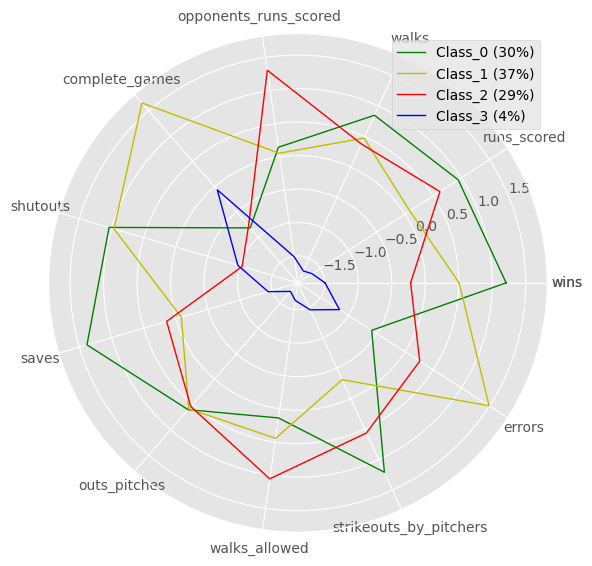

In [120]:
# Radar plot
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)

# Class 0
ax.plot(angles,Class_0, color='g', linewidth=1, label='Class_0 (30%)')
# ax.fill(angles, Class_0, alpha=0.25, color='g')
# Class 1
ax.plot(angles,Class_1, color='y', linewidth=1, label='Class_1 (37%)')
# ax.fill(angles, Class_1, alpha=0.25, color='y')
# Class 2
ax.plot(angles,Class_2, color='r', linewidth=1, label='Class_2 (29%)')
# ax.fill(angles, Class_2, alpha=0.25, color='r')
# Class 3
ax.plot(angles,Class_3, color='b', linewidth=1, label='Class_3 (4%)')
# ax.fill(angles, Class_3, alpha=0.25, color='b')

ax.set_thetagrids(angles * 180/np.pi, labels)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig('radar_chart.png')
plt.show()